Lorenz system

$\dot{x} = \sigma (y - x)$<br>
$\dot{y} = x (\rho - z) - y$<br>
$\dot{z} = x y - \beta z$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def LorenzRHS(y, t, s, r, b):
    x1, x2, x3 = y
    dx1dt = s*(x2 - x1)
    dx2dt = x1*(r - x3) - x2
    dx3dt = x1*x2 - b*x3
    TheRHS = [dx1dt, dx2dt, dx3dt]
    return (TheRHS)

In [3]:
# Parameters:
s, b, r = 10., 8./3, 28.

In [4]:
# time for integration:
t_start = 0
t_stop = 1000
dt = 0.01
t = np.arange(t_start, t_stop, dt)

In [5]:
%%time
# IC:
y0 = np.random.random(size=3)
# y0 = np.array([0., 0., 0.])
print("IC =", y0)

sol = odeint(LorenzRHS, y0, t, args=(s, r, b))

IC = [0.1741613  0.48573994 0.48305072]
CPU times: user 1.13 s, sys: 16.6 ms, total: 1.14 s
Wall time: 1.16 s


#### Phase space plots:

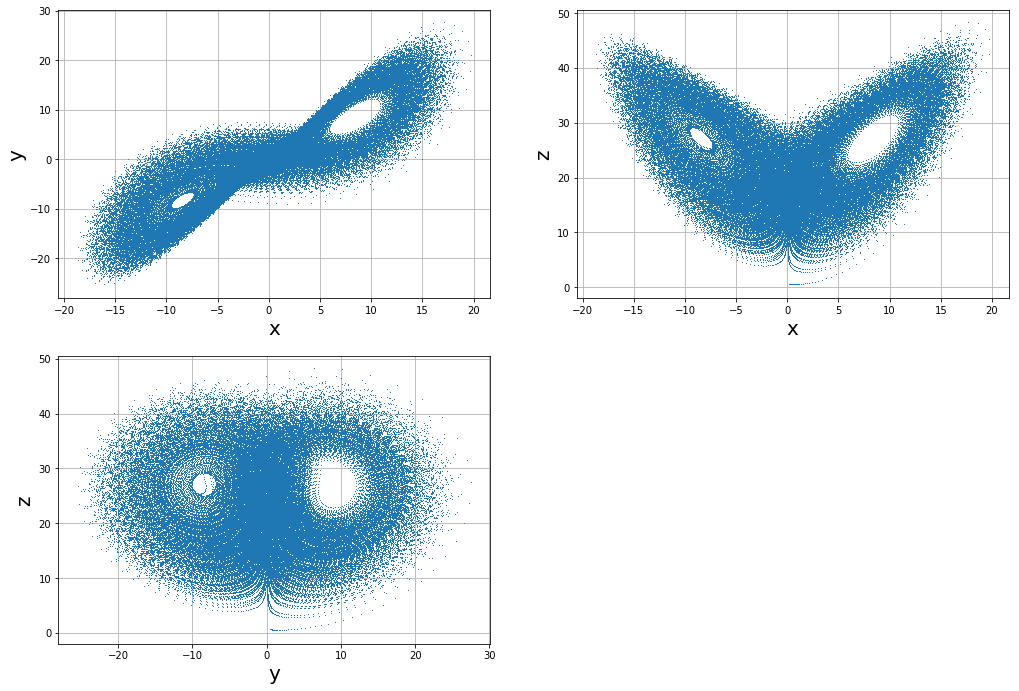

In [6]:
# Plot 2D phase space:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])
ax3 = fig.add_axes([0, -1.2, 1, 1])

ax1.plot(sol[:,0], sol[:,1], ",")
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)

ax2.plot(sol[:,0], sol[:,2], ",")
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('z', fontsize=20)

ax3.plot(sol[:,1], sol[:,2], ",")
ax3.set_xlabel('y', fontsize=20)
ax3.set_ylabel('z', fontsize=20)

for ax in [ax1, ax2, ax3]: ax.grid()
plt.show()

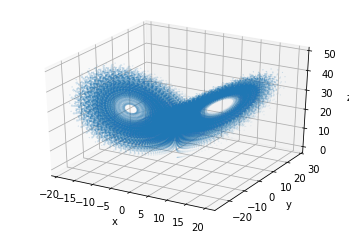

In [7]:
# Plot 3D phase space:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sol[:,0], sol[:,1], sol[:,2], s=.01)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

---

#### Time series plots:

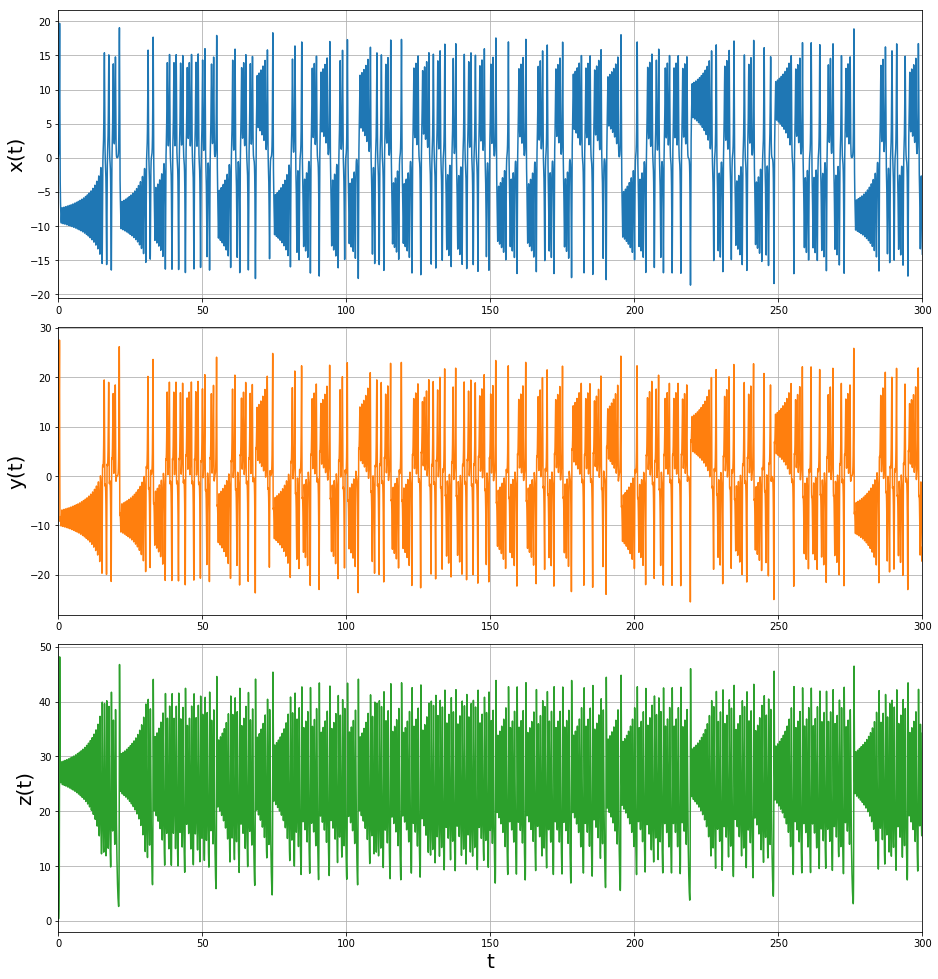

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 2, 1])
ax2 = fig.add_axes([0, -1.1, 2, 1])
ax3 = fig.add_axes([0, -2.2, 2, 1])

ax1.plot(t, sol[:,0], "C0")
ax2.plot(t, sol[:,1], "C1")
ax3.plot(t, sol[:,2], "C2")

ax1.set_ylabel('x(t)', fontsize=20)
ax2.set_ylabel('y(t)', fontsize=20)
ax3.set_ylabel('z(t)', fontsize=20)
ax3.set_xlabel('t', fontsize=20)

for ax in [ax1, ax2, ax3]:
    ax.grid()
    ax.set_xlim([0, 300])

plt.show()

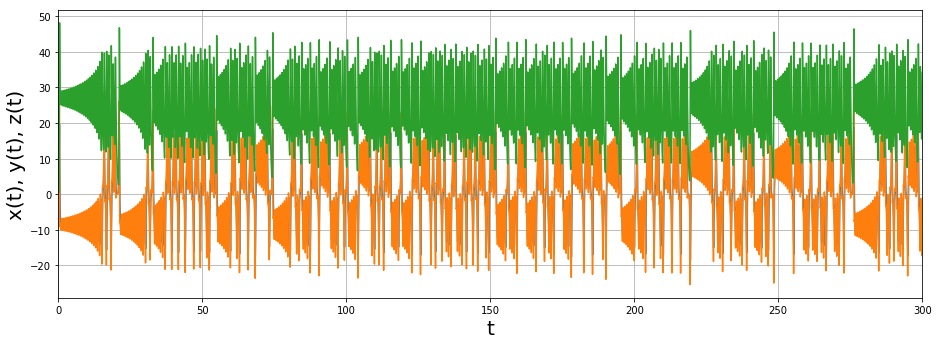

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])

ax.plot(t, sol[:,0], "C0")
ax.plot(t, sol[:,1], "C1")
ax.plot(t, sol[:,2], "C2")

ax.set_xlabel('t', fontsize=20)
ax.set_ylabel('x(t), y(t), z(t)', fontsize=20)

ax.grid()
ax.set_xlim([0, 300])

plt.show()